## Этап 1: Загрузка и предобработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
pd.options.mode.chained_assignment = None


In [3]:
geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [4]:
geo_data_0.info()
geo_data_1.info()
geo_data_2.info()
geo_data_0.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


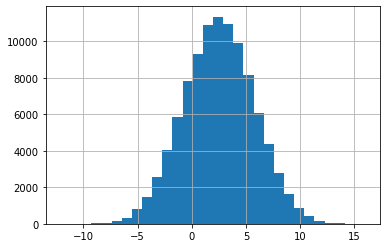

In [6]:
geo_data_0['f2'].hist(bins = 30)

#### Загрузка и подготовка данных   
Данные загружены, пропусков нет, тип для данных указан верный.   
Просмотрел расброс данных признаков с помощью гистограммы.  Признаки f2 распределены более нормально, без выбросов.  

## Этап 2: Подготовка выборок, тестирование моделей

### Обучение модели по данным geo_0

In [64]:
from sklearn.model_selection import train_test_split

In [32]:
target_geo_0 = geo_data_0['product']
features_geo_0 = geo_data_0.drop(['product','id'], axis=1)

features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features_geo_0, target_geo_0, test_size=0.25, random_state=12345)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(features_train0, target_train0)
model_predicted_geo0 = model.predict(features_valid0)
result = mean_squared_error(target_valid0, model_predicted_geo0)
rmse_model_geo_0 = result**0.5

37.5794217150813

In [34]:
#сравнение со случайной величиной (средним)
predictions_mean = pd.Series(target_train0.mean(), index = target_valid0.index)
mse_mean_series = mean_squared_error(target_valid0, predictions_mean)
mse_mean_series**0.5

44.289591053907365

In [35]:
def model_predict (features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    model_predicted = model.predict(features_valid)
    model_predicted_mean = model_predicted.mean()
    result = mean_squared_error(target_valid, model_predicted)
    rmse_model = result**0.5
    predictions_mean = pd.Series(target_valid.mean(), index = target_valid.index)
    mse_mean_series = mean_squared_error(target_valid, predictions_mean)
    rmse_mean = mse_mean_series**0.5
    return 'Model RMSE:', rmse_model, 'Mean RMSE:', rmse_mean, 'Predictions mean:', model_predicted_mean
        

In [36]:
print('geo_0:', model_predict(features_train0, features_valid0, target_train0, target_valid0))

geo_0: ('Model RMSE:', 37.5794217150813, 'Mean RMSE:', 44.28602687855358, 'Predictions mean:', 92.59256778438038)


In [38]:
model_predicted_geo0
target_valid0
geo_0_rmse = 37.5794217150813
geo_0_mean_rmse = 44.289591053907365
geo_0_pred_mean = 92.59256778438038


### Обучение модели по данным geo_1

In [39]:
target_geo_1 = geo_data_1['product']
features_geo_1 = geo_data_1.drop(['product','id'], axis=1)

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features_geo_1, target_geo_1, test_size=0.25, random_state=12345)

In [40]:
print('geo_1:', model_predict(features_train1, features_valid1, target_train1, target_valid1))

geo_1: ('Model RMSE:', 0.893099286775616, 'Mean RMSE:', 46.0212449226281, 'Predictions mean:', 68.72854689544602)


In [65]:
model.fit(features_train1, target_train1)
model_predicted_geo1 = model.predict(features_valid1)
result_geo1 = mean_squared_error(target_valid1, model_predicted_geo1)
rmse_model_geo_1 = result**0.5

In [42]:
model_predicted_geo1
target_valid1
geo_1_rmse = 0.8930992867756158
geo_1_mean_rmse = 46.02144533725462
geo_1_pred_mean = 68.728546895446


### Обучение модели по данным geo_2

In [43]:
target_geo_2 = geo_data_2['product']
features_geo_2 = geo_data_2.drop(['product','id'], axis=1)

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features_geo_2, target_geo_2, test_size=0.25, random_state=12345)

In [44]:
print('geo_2:', model_predict(features_train2, features_valid2, target_train2, target_valid2))

geo_2: ('Model RMSE:', 40.02970873393434, 'Mean RMSE:', 44.902084376898294, 'Predictions mean:', 94.96504596800489)


In [66]:
model.fit(features_train2, target_train2)
model_predicted_geo2 = model.predict(features_valid2)
result_geo2 = mean_squared_error(target_valid2, model_predicted_geo2)
rmse_model_geo_2 = result**0.5


In [46]:
model_predicted_geo2
target_valid2
target_valid_mean = target_valid2.mean()
geo_2_rmse = 40.02970873393434
geo_2_mean_rmse = 44.90234968510566
geo_2_pred_mean = 94.96504596800489


### Выводы:  
Минимальный показатель RMSE выявлен в geo_1, однако в этом регионе самое низкое среднее значение по запасам.    
Показатели RMSE модели стабильно ниже, чем RMSE средних значений валидационных выборок, с которым сравнивалась работа модели.  
Делаю вывод об адекватности модели.  


## Этап 3: Расчёт прибыли  

In [30]:
exploration_cost = 10000000000
brl_price = 450000
necessary_profit =  exploration_cost / 200
unit_prod = necessary_profit / brl_price
necessary_total_prod = exploration_cost/ brl_price

estimate_table = pd.DataFrame({
    'index':['exploration cost', 'income per unit', 'production per unit', 'total product per region'],
    'value': [exploration_cost, necessary_profit, unit_prod, necessary_total_prod]
})
estimate_table['value'] = round(estimate_table['value'],3)
estimate_table['value'] = estimate_table['value'].astype('str')
estimate_table

,index,value
0,exploration cost,10000000000.0
1,income per unit,50000000.0
2,production per unit,111.111
3,total product per region,22222.222


In [51]:
compare_mean_result = pd.DataFrame({
    'geo': [0, 1, 2, 'necessary'], 'value': [geo_0_pred_mean, geo_1_pred_mean, geo_2_pred_mean, unit_prod]
})
compare_mean_result['ration with necessary'] = compare_mean_result['value']/unit_prod
print('Сравнение среднего значения запасов по каждому региону и необходимого:')
compare_mean_result

Сравнение среднего значения запасов по каждому региону и необходимого:


,geo,value,ration with necessary
0,0,92.592568,0.833333
1,1,68.728547,0.618557
2,2,94.965046,0.854685
3,necessary,111.111111,1.000000


### Выводы по п. 3:  
Для выхода в безубыток каждое из 200 месторождений должно приносить не менее 50 млн. выручки.  
Каждое из 200 месторождений должно принести не менее 111.111 тыс. баррелей.  
Суммарный объём сырья в регионе должен быть не менее 22222.222 тыс. баррелей.  
Сравнение средних значений прогноза по всем трём регионам оказалось ниже необходимого значения на 25-38%.  

In [55]:
from numpy.random import RandomState

def profit (target, probabilities):
    state = np.random.RandomState()
    target = pd.Series(target)
    probabilities = pd.Series(probabilities)
    probabilities.index = target.index
    prob_sample = probabilities.sample(n = 500, replace=True, random_state=state)
    probs_sorted = prob_sample.sort_values(ascending=False)
    selected = target[probs_sorted.index][:200]
    return brl_price * selected.sum() - exploration_cost
    


Функция расчёта прибыли принимает на вход реальные значения и предсказания.  
Из выборки с предсказаниями выбираются 500 случайных.  
Из 500 случайных отбираются 200 с наибольшим результатом по запасам.  
По индексам 200 отобранных предсказаниц, мы обращаемся к реальным данным по отобранным скважинам.  
Рассчёт прибыли ведём по реальным данным: умножаем стоимость 1000 баррелей на сумму запасов выборки.  
Из получившегося значения вычитаем расходы на освоение региона.  

## Этап 4: Анализ рисков  

In [60]:
values_geo0 = []
count_geo0 = 0
for i in range(1000):
    result = profit(target_valid0, model_predicted_geo0)
    values_geo0.append(result)
    if result < 0:
        count_geo0+=1

values_geo1 = []
count_geo1 = 0
for i in range(1000):
    result = profit(target_valid1, model_predicted_geo1)
    values_geo1.append(result)
    if result < 0:
        count_geo1+=1

values_geo2 = []
count_geo2 = 0
for i in range(1000):
    result = profit(target_valid2, model_predicted_geo2)
    values_geo2.append(result)
    if result < 0:
        count_geo2+=1

    


In [61]:
from scipy.stats import t

bootstrap_data_geo0 = pd.Series(values_geo0)
mean_geo0 = bootstrap_data_geo0.mean()
confidence_interval_geo0 = t.interval(0.95, len(values_geo0)-1, mean_geo0, bootstrap_data_geo0.sem())
pvalue_geo0 = 1. * count_geo0 / 1000

bootstrap_data_geo1 = pd.Series(values_geo1)
mean_geo1 = bootstrap_data_geo1.mean()
confidence_interval_geo1 = t.interval(0.95, len(values_geo1)-1, mean_geo1, bootstrap_data_geo1.sem())
pvalue_geo1 = 1. * count_geo1 / 1000

bootstrap_data_geo2 = pd.Series(values_geo2)
mean_geo2 = bootstrap_data_geo2.mean()
confidence_interval_geo2 = t.interval(0.95, len(values_geo2)-1, mean_geo2, bootstrap_data_geo2.sem())
pvalue_geo2 = 1. * count_geo2 / 1000





In [62]:
common_result = pd.DataFrame({
    'geo': [0, 1, 2], 'mean': [mean_geo0, mean_geo1, mean_geo2],
    'confidence interval': [confidence_interval_geo0, confidence_interval_geo1, confidence_interval_geo2],
    'loss probabilities':[pvalue_geo0, pvalue_geo1, pvalue_geo2]

})

In [63]:
common_result['mean'] = common_result['mean'].astype(int)
common_result

,geo,mean,confidence interval,loss probabilities
0,0,385227599,"(368917134.7846566, 401538064.6448205)",0.066
1,1,456888286,"(444122573.8748333, 469653999.57484335)",0.017
2,2,391546627,"(374981378.2756602, 408111876.55800647)",0.073


# Выводы. 
Исследование показало, что разработка региона 1 является наиболее рациональным решением, поскольку:  
1) Самое высокое значение средней прибыли после масштабных опытов с Bootstrap.  
2) Самая низкая (единственно допустимая) вероятность убытка.  

